## Challenge: Exercise 4

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Statistics about searches with bookings

In [2]:
import bz2
files_path = "/home/dsc/Repositories/Master-in-Data-Science/Data/"

##### Loading and formatting searches file

In [3]:
# Loading searches file
searches_df = pd.read_csv(files_path+"new_searches.csv",sep='^')
searches_df = searches_df.dropna(subset=['Seg1Date'])

# Adding column with days between search and departure
searches_df['BookDate'] = searches_df['Date'].apply(lambda d: pd.Timestamp(pd.to_datetime(d).date()))
searches_df['DepDate'] = searches_df['Seg1Date'].apply(lambda d: pd.Timestamp(pd.to_datetime(d).date()))
searches_df['DiffDates'] = searches_df.DepDate-searches_df.BookDate
searches_df['DaysToDep'] = searches_df['DiffDates'].apply(lambda d: (d/np.timedelta64(1, 'D')).astype(int))

##### Grouping by period search/departure

In [4]:
result_df = DataFrame(searches_df.groupby('DaysToDep')['Is_Booked'].sum())
result_df['TotSearched'] = searches_df.groupby('DaysToDep')['Is_Booked'].count()

# Adding column with rate_conversion
result_df['Rate_Conversion'] = result_df.Is_Booked/result_df.TotSearched*100
result_df.reset_index(inplace=True)
result_df.sort('DaysToDep',ascending=False,inplace=True)

#### Top searching days

In [5]:
result_df.sort('TotSearched',ascending=False).head(3)

,DaysToDep,Is_Booked,TotSearched,Rate_Conversion
3,3,313,2037,15.365734
7,7,184,1871,9.834313
14,14,155,1841,8.419337


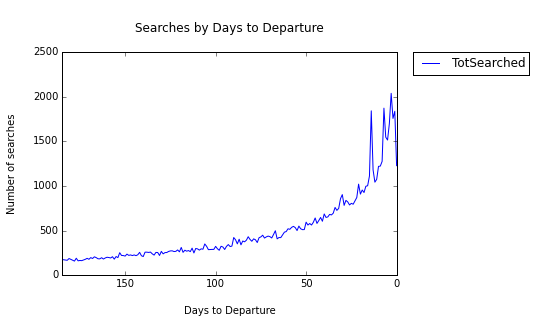

In [6]:
result_df[result_df['TotSearched'] > 154 ]['TotSearched'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nSearches by Days to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Number of searches\n")
plt.show()

#### Top searching days with booking

In [7]:
result_df.sort('Is_Booked',ascending=False).head(3)

,DaysToDep,Is_Booked,TotSearched,Rate_Conversion
3,3,313,2037,15.365734
1,1,223,1836,12.145969
4,4,221,1699,13.007652


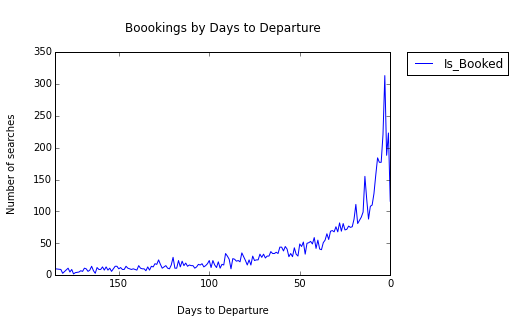

In [8]:
result_df[result_df['TotSearched'] > 154 ]['Is_Booked'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nBoookings by Days to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Number of searches\n")
plt.show()

#### Top by rate_conversion searching days  

In [9]:
result_df[result_df.TotSearched > 154].sort('Rate_Conversion',ascending=False).head(3)

,DaysToDep,Is_Booked,TotSearched,Rate_Conversion
3,3,313,2037,15.365734
4,4,221,1699,13.007652
8,8,157,1275,12.313725


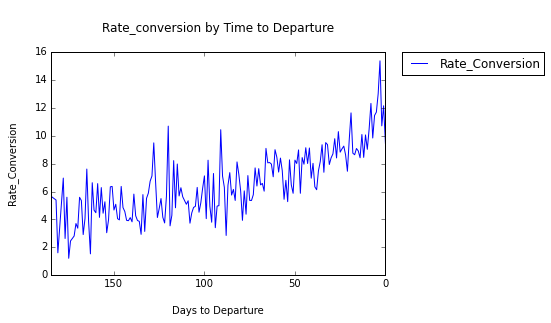

In [10]:
result_df[result_df['TotSearched'] > 154 ]['Rate_Conversion'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nRate_conversion by Time to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Rate_Conversion\n")
plt.show()

### Statistics by Country

In [11]:
result_df = DataFrame(searches_df.groupby('Country')['Is_Booked'].sum())
result_df['TotSearched'] = searches_df.groupby('Country')['Is_Booked'].count()
# Adding column with rate_conversion
result_df['Rate_Conversion'] = result_df.Is_Booked/result_df.TotSearched*100
# Adding column with average DaysToDep
result_df['DaysToDep'] = searches_df.groupby('Country')['DaysToDep'].mean()

result_df.reset_index(inplace=True)

#### Top searching countries

In [12]:
result_df.sort('TotSearched',ascending=False).head(3)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
151,US,1887,27059,6.973650,80.104549
37,DE,1099,13808,7.959154,87.790918
51,GB,536,7370,7.272727,90.759837


#### Top travelling countries

In [13]:
result_df.sort('Is_Booked',ascending=False).head(3)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
151,US,1887,27059,6.973650,80.104549
37,DE,1099,13808,7.959154,87.790918
130,SA,578,1700,34.000000,16.623529


#### Top (and no) confident countries

In [14]:
result_df[result_df['TotSearched'] > 500].sort('Rate_Conversion',ascending=False).head(3)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
130,SA,578,1700,34.000000,16.623529
6,AU,320,1471,21.753909,85.040109
142,TH,125,720,17.361111,67.472222


In [15]:
result_df[result_df['TotSearched'] > 500].sort('Rate_Conversion').head(3)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
149,UA,12,506,2.371542,55.494071
128,RU,81,3378,2.397869,59.555358
19,BR,95,3557,2.670790,62.178240


#### Top (and no) farsighted countries

In [16]:
result_df[result_df['TotSearched'] > 500].sort('DaysToDep',ascending=False).head(3)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
51,GB,536,7370,7.272727,90.759837
37,DE,1099,13808,7.959154,87.790918
6,AU,320,1471,21.753909,85.040109


In [17]:
result_df[result_df['TotSearched'] > 500].sort('DaysToDep').head(3)

,Country,Is_Booked,TotSearched,Rate_Conversion,DaysToDep
130,SA,578,1700,34.000000,16.623529
69,IN,242,2116,11.436673,51.250945
149,UA,12,506,2.371542,55.494071
